### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

pd.set_option('display.max.rows',80)
pd.set_option('display.max.columns',130)

In [2]:
# Зчитування дані marketing_campaign.csv в pandas dataframe

raw_df = pd.read_csv('./data/marketing_campaign.csv', sep = '\t', index_col = 'ID')

In [3]:
# Загальний вигляд даних

raw_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
# Розмір датафрейма

raw_df.shape

(2240, 28)

Датафрейм містить 2240 рядків і 28 стовпців.

In [5]:
# Типи даних стовпців, кількість пропущених значень

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   int

Лише один стовпець містить пропущені значення - змінна `Income`.

In [6]:
# Зміна типу даних стовпця Dt_Customer на datetime

raw_df['Dt_Customer'] = pd.to_datetime(raw_df['Dt_Customer'], dayfirst=True)

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [7]:
# Кількість і відсоток пропущених значень у стовпці Income

print(f"К-сть пропущених значень: {raw_df['Income'].isnull().sum()}")
print(f"Відсоток пропущених значень: {(raw_df['Income'].isnull().sum()/raw_df.shape[0]):.2%}")

К-сть пропущених значень: 24
Відсоток пропущених значень: 1.07%


In [8]:
# Обчислення основних статистик стовпця Income

print(f"Мода: {raw_df['Income'].mode()[0]}")
print(f"Медіана: {raw_df['Income'].median()}")
print(f"Середнє: {raw_df['Income'].mean()}")

Мода: 7500.0
Медіана: 51381.5
Середнє: 52247.25135379061


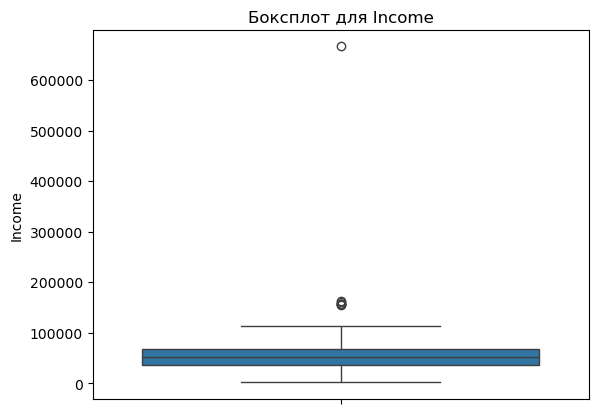

In [9]:
# Діаграма розмаху для стовпця Income

sns.boxplot(raw_df['Income'])
plt.title('Боксплот для Income')
plt.show()

Медіана і середнє знаходяться досить близько. Середнє трохи зміщене вправо за рахунок викидів.\
Замінити пропущені значення доцільно медіаною.

In [10]:
# Заміна пропущених значень у стовпці Income медіаною

raw_df['Income'] = raw_df['Income'].fillna(raw_df['Income'].median())

In [11]:
# Перевірка кількості пропущених значень у стовпці Income

raw_df['Income'].isnull().sum()

0

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [12]:
# Перелік числових, категоріальних стовпців і стовпців з датами

numeric_cols = raw_df.select_dtypes(include = 'number').columns.tolist()
categorical_cols = raw_df.select_dtypes(include = 'object').columns.tolist()
date_cols = raw_df.select_dtypes(include = 'datetime').columns.tolist()

print(f"Числові стовпці:\n {numeric_cols}\n")
print(f"Категоріальні стовпці:\n {categorical_cols}\n")
print(f"Стовпці дат:\n {date_cols}")

Числові стовпці:
 ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

Категоріальні стовпці:
 ['Education', 'Marital_Status']

Стовпці дат:
 ['Dt_Customer']


In [13]:
# Кількість числових, категоріальних стовпців і стовпців з датами

print(f"К-сть числових стовпців: {len(numeric_cols)}")
print(f"К-сть категоріальних стовпців: {len(categorical_cols)}")
print(f"К-сть стовпців дат: {len(date_cols)}")

К-сть числових стовпців: 25
К-сть категоріальних стовпців: 2
К-сть стовпців дат: 1


In [14]:
# Визначення унікальних значень категоріальних стовпців

print(f"Унікальні значення стовпця Education: {raw_df['Education'].unique()}")
print(f"Унікальні значення стовпця Marital_Status: {raw_df['Marital_Status'].unique()}")

Унікальні значення стовпця Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Унікальні значення стовпця Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


Кодування категоріальних стовпців:

In [15]:
# Виклик OneHotEncoder
# Визначення списку категорій в усіх категоріальних стовпцях

encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [16]:
# Генерування назв стовпців для кожної окремої категорії
# Додавання закодованих стовпців до raw_df

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
raw_df[encoded_cols] = encoder.transform(raw_df[categorical_cols])

Генерування нових ознак на основі стовпця Dt_Customer

In [17]:
# Тривалість "життя" клієнта у днях

raw_df['Lifetime_days'] = (raw_df['Dt_Customer'] - raw_df['Dt_Customer'].min()).dt.days

numeric_cols.append('Lifetime_days')

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [18]:
X = raw_df[numeric_cols + encoded_cols]

In [19]:
kmeans = KMeans(n_clusters = 3, n_init = 'auto')
kmeans.fit(X)
labels = kmeans.predict(X)
s = metrics.silhouette_score(X, labels, metric = 'euclidean')
print(f'Silhouette Coefficient: {s:.2f}')

Silhouette Coefficient: 0.60


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

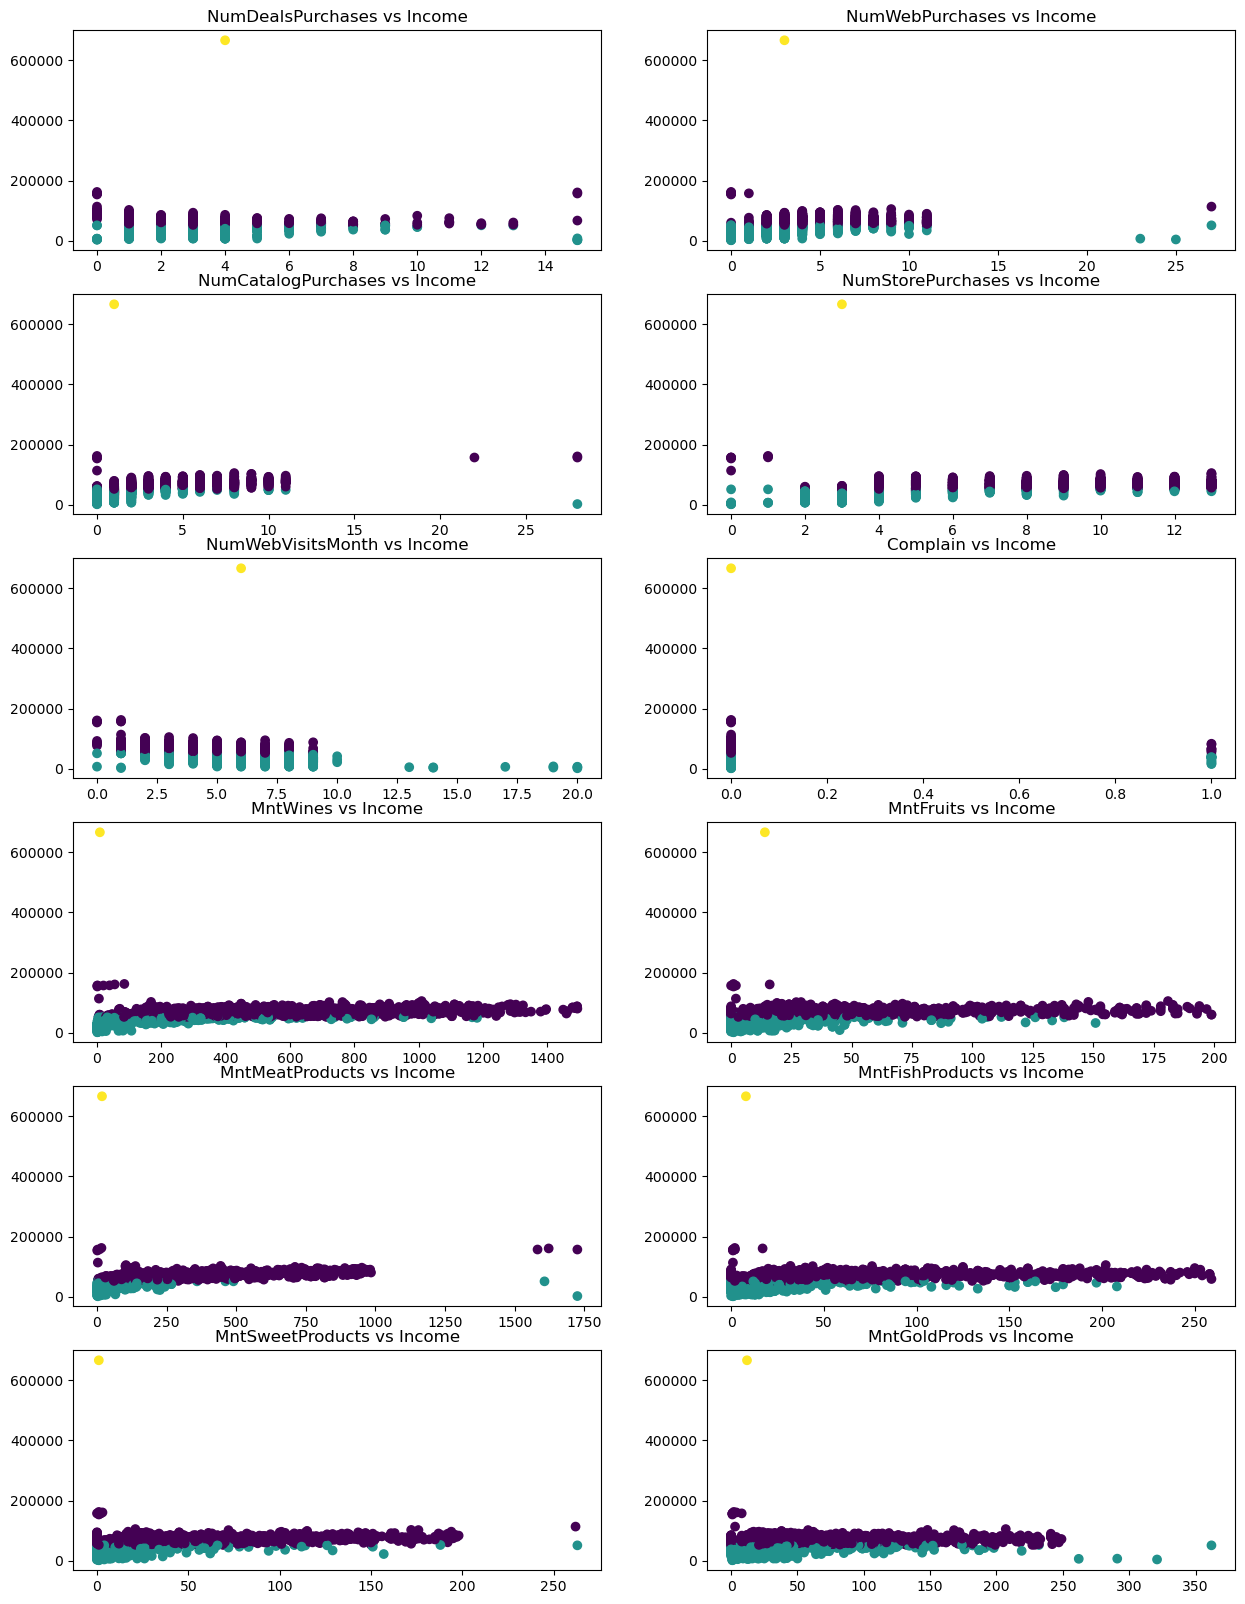

In [20]:
# Список ознак, що характеризують взаємодію клієнта з магазином

columns_for_check = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                     'Complain', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Візуалізація кластерів за двома ознаками: дохід клієнта і одна з характеристик його взаємодії з магазином

plt.figure(figsize = (15, 20))
for i in columns_for_check:
    plt.subplot(6, 2, columns_for_check.index(i) + 1)
    plt.scatter(X[i], X['Income'], c=labels)
    plt.title(f"{i} vs Income")

**Спостереження**:\
Кластери мають сенс.\
Наприклад, чітко видно залежність між доходом клієнта і сумою, витраченою на різні типи продуктів за останні два роки. Люди з низьким доходом, як правило, витрачають значно менше на ці покупки (особливо помітним є розподіл щодо купівлі м’яса). Хоча є винятки.    

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [21]:
X_scaled = X.copy()

In [22]:
scaler = MinMaxScaler()
scaler.fit(X_scaled[numeric_cols])

MinMaxScaler()

In [23]:
X_scaled[numeric_cols] = scaler.transform(X_scaled[numeric_cols])

In [24]:
kmeans_scaled = KMeans(n_clusters = 3, n_init = 'auto')
kmeans_scaled.fit(X_scaled)
labels_scaled = kmeans_scaled.predict(X_scaled)
s = metrics.silhouette_score(X_scaled, labels_scaled, metric = 'euclidean')
print(f'Silhouette Coefficient: {s:.2f}')

Silhouette Coefficient: 0.18


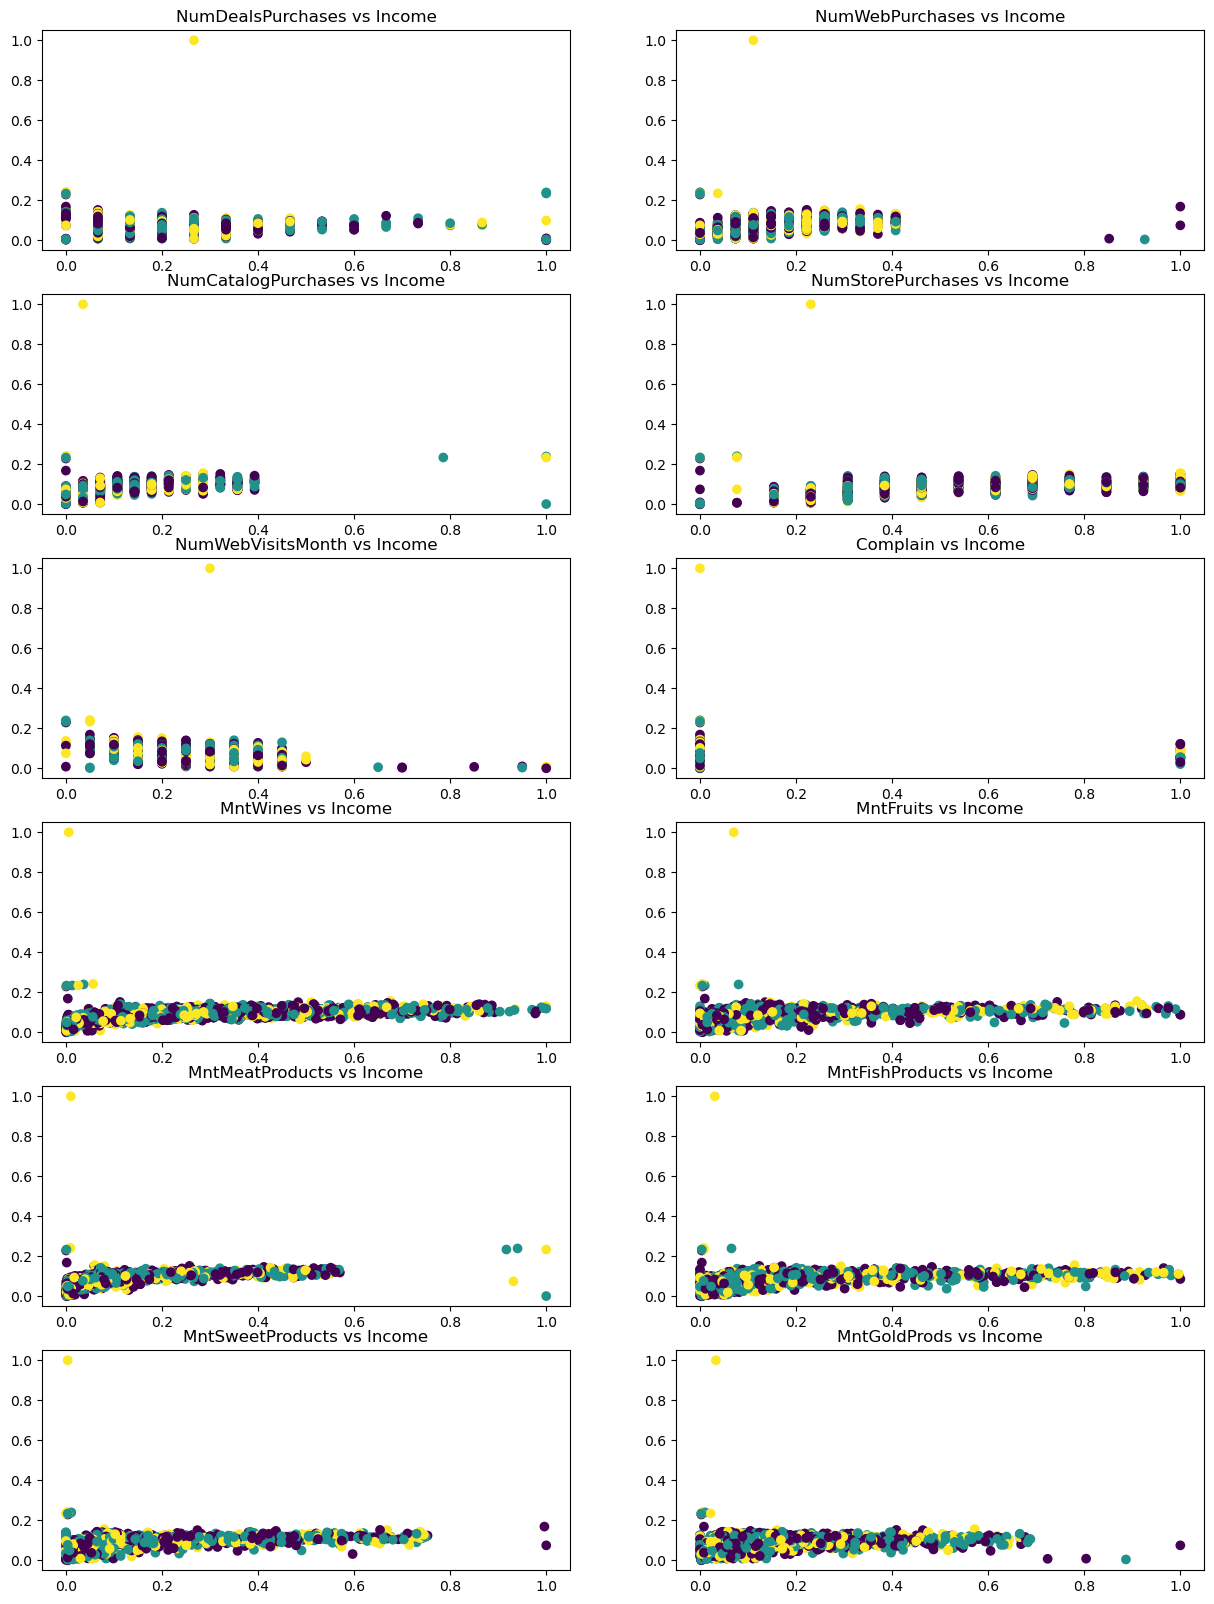

In [25]:
plt.figure(figsize = (15, 20))
for i in columns_for_check:
    plt.subplot(6, 2, columns_for_check.index(i) + 1)
    plt.scatter(X_scaled[i], X_scaled['Income'], c=labels_scaled)
    plt.title(f"{i} vs Income")

**Спостереження**:\
Масштабування призвело до зникнення характерного паттерну розбиття на кластери.\
Метрика Silhouette Coefficient значно зменшилась (з 0,60 до 0,18).

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [26]:
# Список ознак для опрацювання викидів (ознаки з попередніх візуалізацій)

columns_for_cleaning = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']

In [27]:
X_cleaned = X.copy()

In [28]:
# Функція видалення викидів зі стовпця

def drop_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    min_value = (q1 - 1.5 * iqr)
    max_value = (q3 + 1.5 * iqr)
    outlier_mask = (df[column] < min_value) | (df[column] > max_value)
    outlier_index = df[outlier_mask].index
    df = df.drop(outlier_index)
    return df

In [29]:
# Видалення викидів зі стовпців

for i in columns_for_cleaning:
    X_cleaned = drop_outliers(X_cleaned, i)

In [30]:
# Перевірка розміру датафрейму, очищеного від викидів

X_cleaned.shape

(973, 39)

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

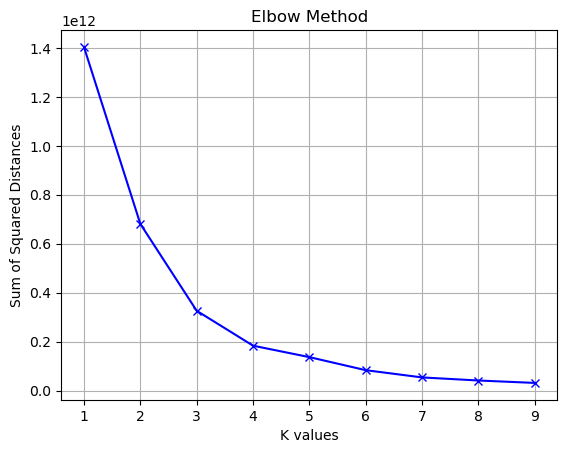

In [31]:
# Elbow method для пошуку оптимальної кількості кластерів в оригінальному наборі Х

K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.grid()
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

Оптимальна кількість кластерів K=3.\
З такою кількістю кластерів модель KMeans для набору Х натренована вище.

**Пошук оптимальної кількості кластерів для очищеного від викидів набору X_cleaned (без масштабування)**

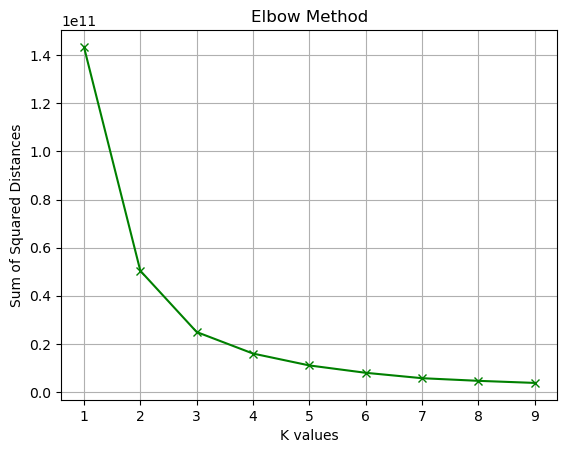

In [32]:
# Elbow method для пошуку оптимальної кількості кластерів в наборі Х_cleaned

K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X_cleaned)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'gx-')
plt.grid()
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

Оптимальна кількість кластерів для очищеного від викидів набору X_cleaned також K=3.\
Натренуємо модель KMeans для набору Х_cleaned з оптимальною кількістю кластерів. Обчислимо метрику силуету. Візуалізуємо кластери. 

In [33]:
kmeans_cleaned = KMeans(n_clusters = 3, n_init = 'auto')
kmeans_cleaned.fit(X_cleaned)
labels_cleaned = kmeans_cleaned.predict(X_cleaned)
s = metrics.silhouette_score(X_cleaned, labels_cleaned, metric = 'euclidean')
print(f'Silhouette Coefficient: {s:.2f}')

Silhouette Coefficient: 0.55


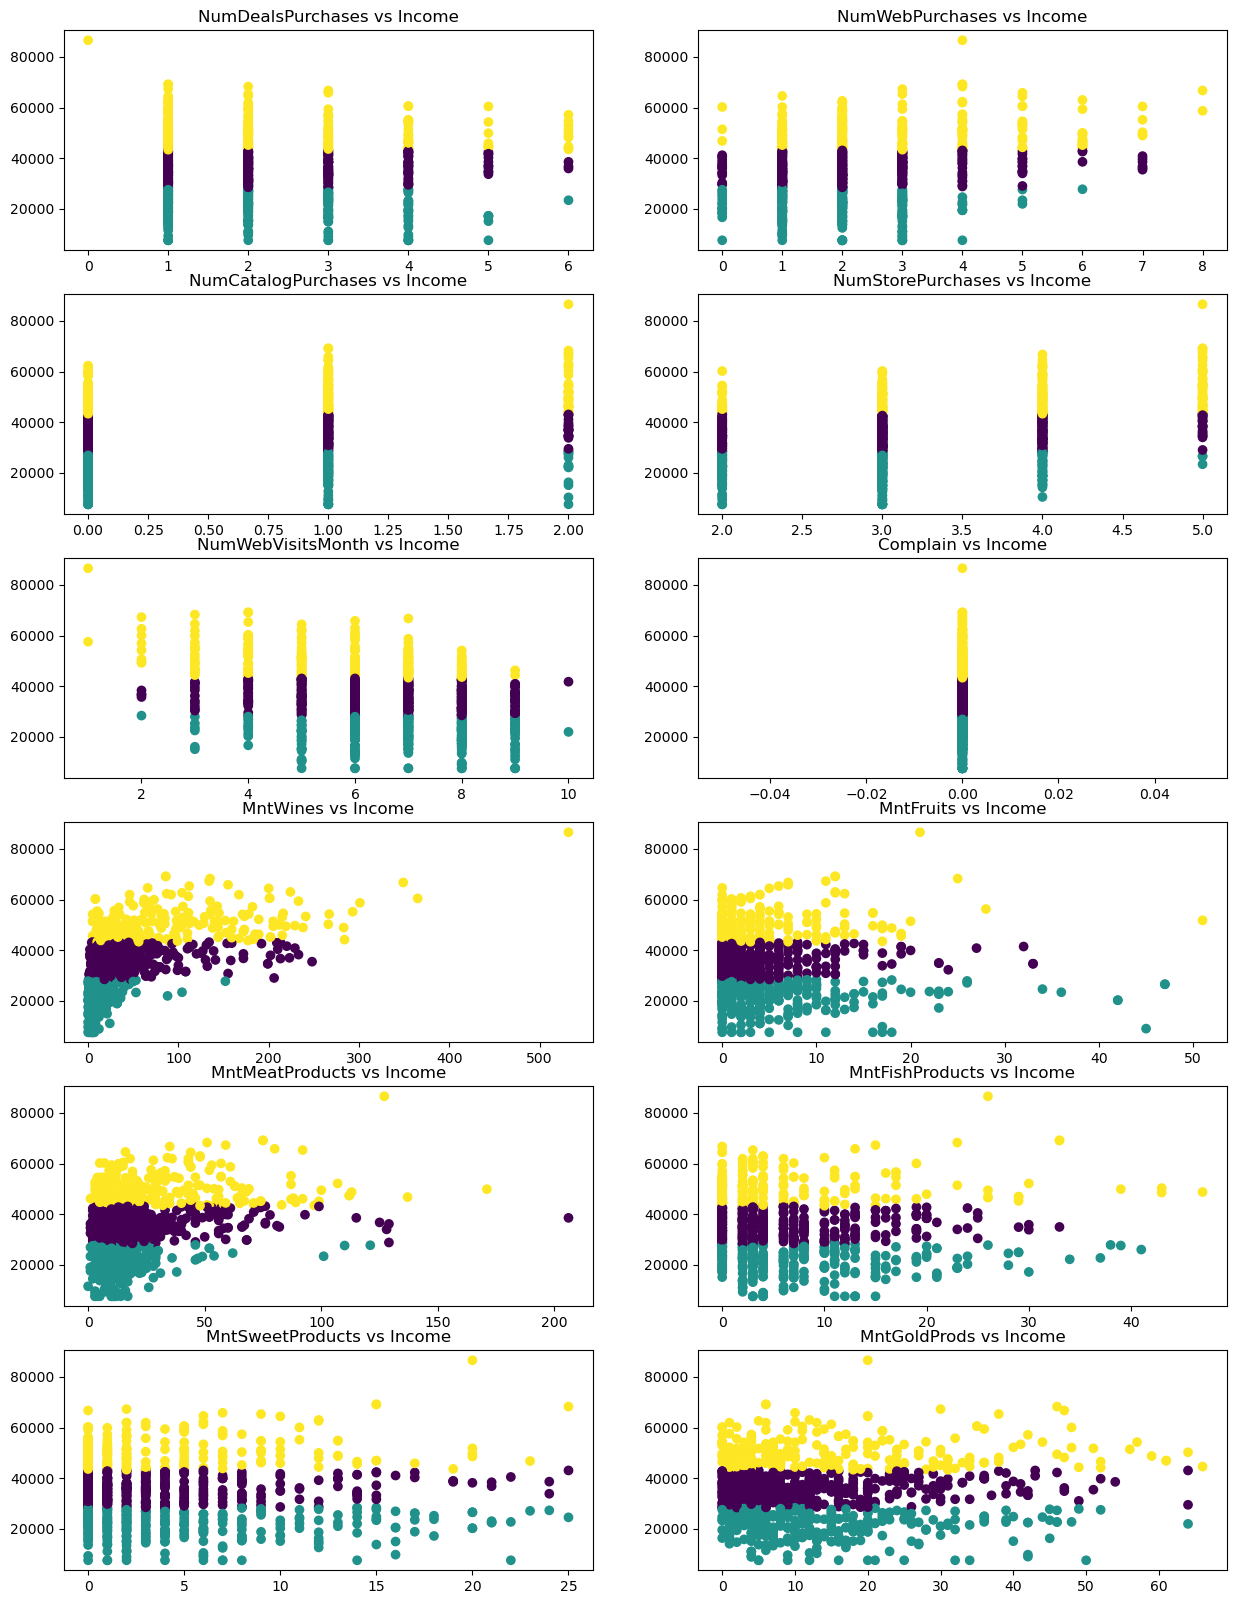

In [34]:
plt.figure(figsize = (15, 20))
for i in columns_for_check:
    plt.subplot(6, 2, columns_for_check.index(i) + 1)
    plt.scatter(X_cleaned[i], X_cleaned['Income'], c=labels_cleaned)
    plt.title(f"{i} vs Income")

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

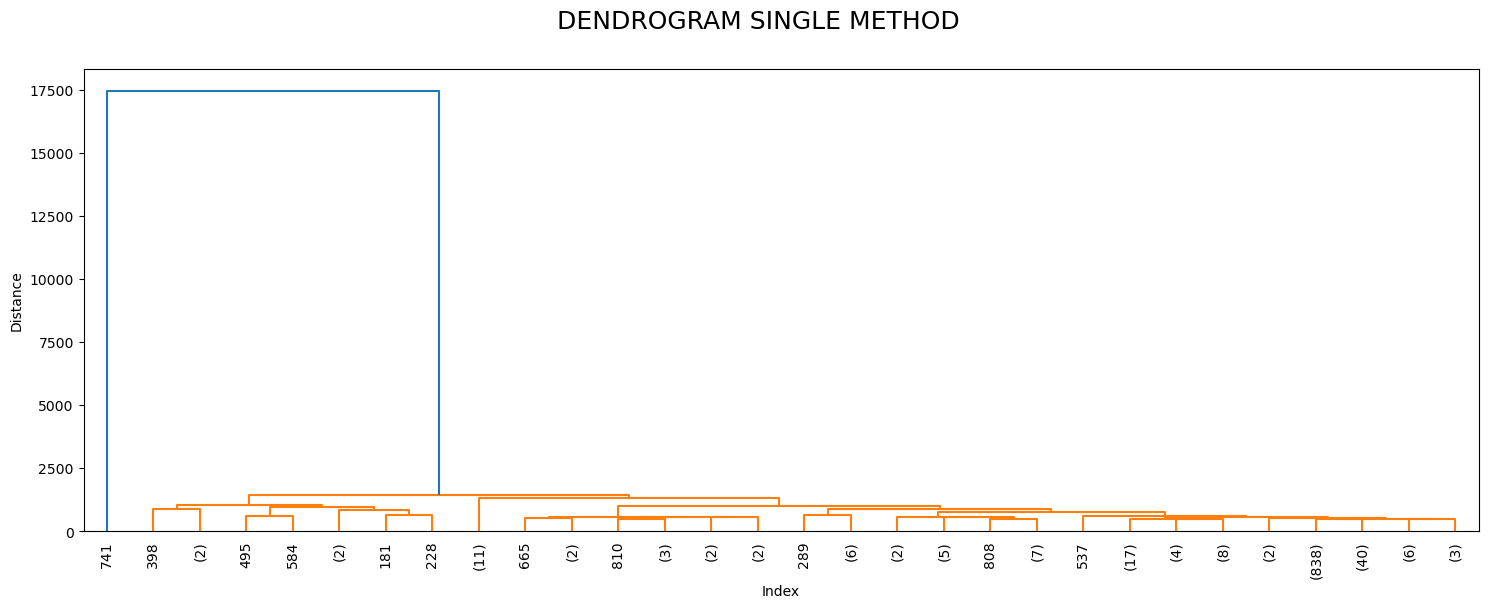

In [35]:
dist_sin = linkage(X_cleaned, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [36]:
X_cleaned['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
X_cleaned['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

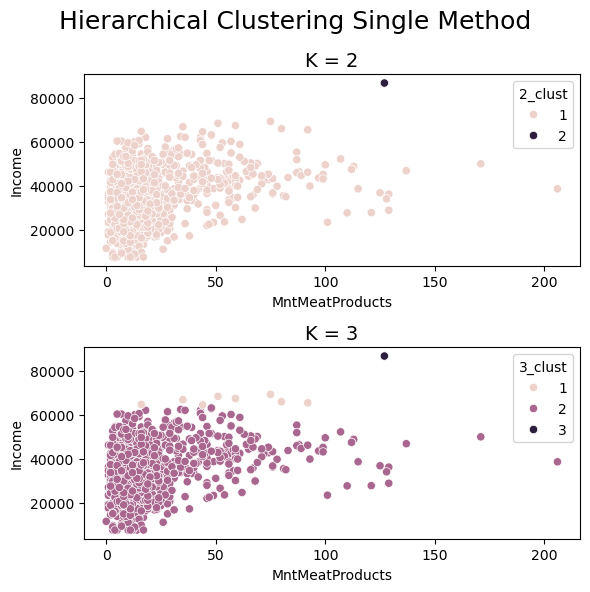

In [37]:
plt.figure(figsize = (6, 6))

plt.suptitle("Hierarchical Clustering Single Method", fontsize = 18)

plt.subplot(2, 1, 1)
plt.title("K = 2", fontsize = 14)
sns.scatterplot(x = "MntMeatProducts", y = "Income", data = X_cleaned, hue = "2_clust")

plt.subplot(2, 1, 2)
plt.title("K = 3", fontsize = 14)
sns.scatterplot(x = "MntMeatProducts", y = "Income", data = X_cleaned, hue = "3_clust")

plt.tight_layout();

In [38]:
# Метрика силуету

s_2_clust = metrics.silhouette_score(X_cleaned, X_cleaned['2_clust'], metric='euclidean')
s_3_clust = metrics.silhouette_score(X_cleaned, X_cleaned['3_clust'], metric='euclidean')

print(f'Silhouette Coefficient_2_clust: {s_2_clust:.2f}')
print(f'Silhouette Coefficient_3_clust: {s_3_clust:.2f}')

Silhouette Coefficient_2_clust: 0.71
Silhouette Coefficient_3_clust: 0.51


**Спостереження**:\
Якщо порівнювати розбиття на 3 кластери набору X_cleaned для обох методів, то, судячи з візуалізацій, метод ієрархічної кластеризації спрацював гірше за kMeans. Саме таке розбиття на кластери незрозуміле.

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

**Повне з'єднання (Complete linkage)**

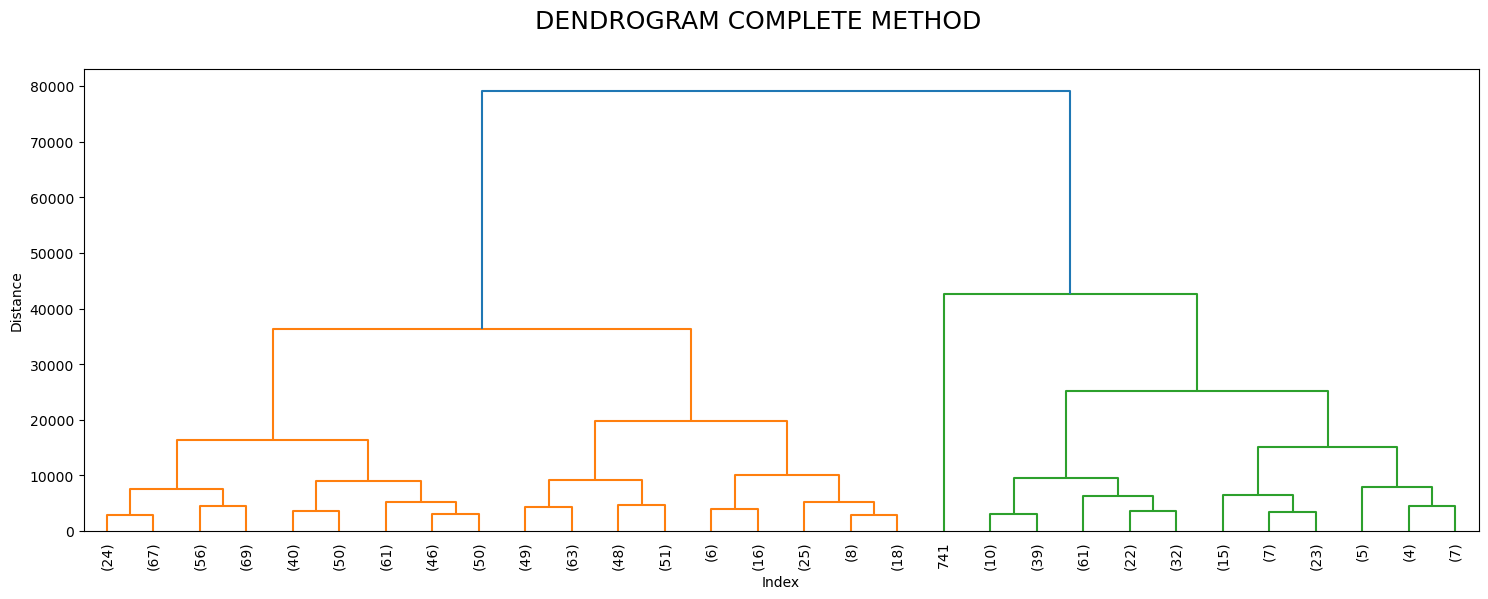

In [39]:
dist_comp = linkage(X_cleaned, method="complete")
plt.figure(figsize=(18,6))
dendrogram(dist_comp, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM COMPLETE METHOD",fontsize=18)
plt.show()

In [40]:
X_cleaned['2_clust_CM'] = fcluster(dist_comp, 2, criterion='maxclust')
X_cleaned['3_clust_CM'] = fcluster(dist_comp, 3, criterion='maxclust')

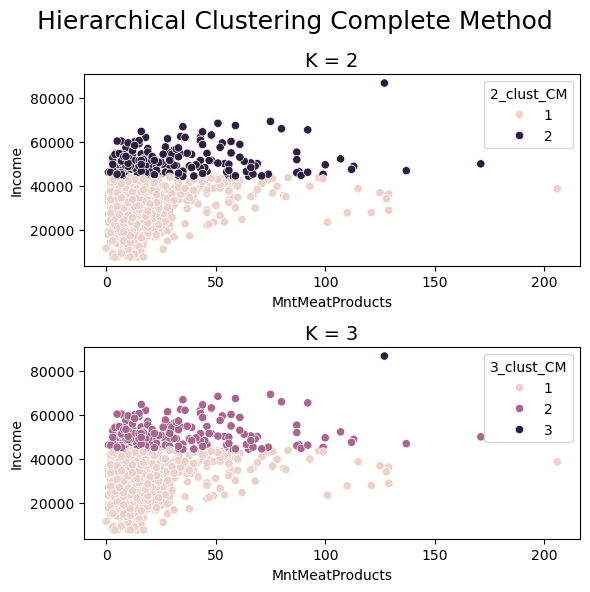

In [41]:
plt.figure(figsize = (6, 6))

plt.suptitle("Hierarchical Clustering Complete Method", fontsize = 18)

plt.subplot(2, 1, 1)
plt.title("K = 2", fontsize = 14)
sns.scatterplot(x = "MntMeatProducts", y = "Income", data = X_cleaned, hue = "2_clust_CM")

plt.subplot(2, 1, 2)
plt.title("K = 3", fontsize = 14)
sns.scatterplot(x = "MntMeatProducts", y = "Income", data = X_cleaned, hue = "3_clust_CM")

plt.tight_layout();

In [42]:
# Метрика силуету

s_2_clust_CM = metrics.silhouette_score(X_cleaned, X_cleaned['2_clust_CM'], metric='euclidean')
s_3_clust_CM = metrics.silhouette_score(X_cleaned, X_cleaned['3_clust_CM'], metric='euclidean')

print(f'Silhouette Coefficient_2_clust_CM: {s_2_clust_CM:.2f}')
print(f'Silhouette Coefficient_3_clust_CM: {s_3_clust_CM:.2f}')

Silhouette Coefficient_2_clust_CM: 0.52
Silhouette Coefficient_3_clust_CM: 0.51


**Спостереження**:\
Ієрархічна кластеризація з повним з’єднанням (Complete linkage) показала візуально кращий результат, ніж попередній варіант – ієрархічна кластеризація з одиночним з'єднанням (Single linkage).\
Але вважаю, все ж, результати методу kMeans (ліва візуалізація) найбільш корисними для подальшої роботи з ними. Хоча все залежить від цілей.

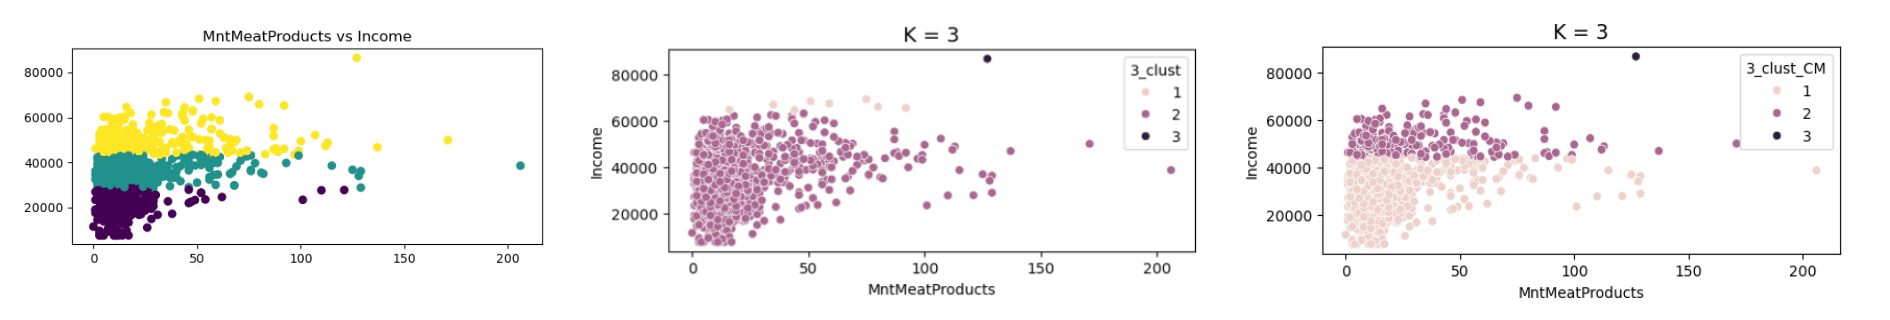